In [18]:
import pandas as pd
from scipy import stats
import numpy as np

import seaborn as sns

### Доверительный интервал уровня 95%

$$X_1 = (\bar{X} - 2SE; \bar{X} + 2SE)$$

In [25]:
# Посчитаем доверительный интервал.

d = [128, 127, 118, 115, 144, 142, 133, 140, 132, 131, 
     111, 132, 149, 122, 139, 119, 136, 129, 126, 128, 113, 185, 143, 140, 123, 126, 134]

d = np.array(d)
s = d.var()
se = (s/len(d))**0.5
mean = d.mean()

x_left = mean - 2*se
x_right = mean + 2*se

print(f"X_1 = ({x_left}, {x_right})")

X_1 = (126.57512855728169, 137.4989455167924)


In [2]:
wines=pd.read_csv('wine_data.csv')

In [3]:
wines.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [6]:
wines.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### С помощью данного метода можно получить посчитанные статистики для каждого признака. Очень удобно!


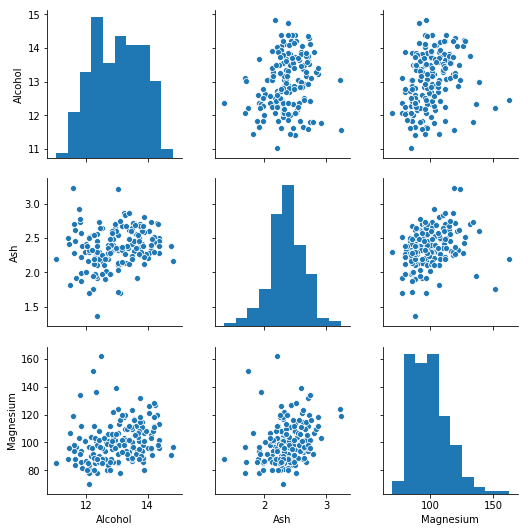

In [8]:
sns.pairplot(wines, vars=['Alcohol', 'Ash', 'Magnesium'],
                 kind='scatter')  
## Визуализация зависимостей признаков друг от друга
## Строится таблица NxN, симметричные пары отличаются переворачиванием осей
## Очень наглядно бывают видны зависимости -> полезная вещь

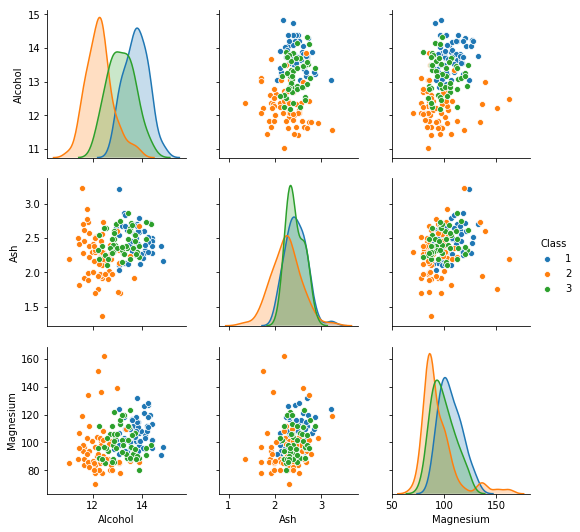

In [11]:
sns.pairplot(wines, hue='Class', vars=['Alcohol', 'Ash', 'Magnesium'],
                 kind='scatter')  
## поле "hue" используется для раскраски и добавляет наглядности
## для него можно использовать целевую переменную (в данном случае класс вина)

Советую поиграться с параметрами этой функции. 

Еще примеры можно посмотреть здесь https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [12]:
data=pd.read_csv('brain_size.csv', sep=';')

In [13]:
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118,64.5,816932
1,2,Male,140,150,124,.,72.5,1001121
2,3,Male,139,123,150,143,73.3,1038437
3,4,Male,133,129,128,172,68.8,965353
4,5,Female,137,132,134,147,65.0,951545


In [14]:
corr = data.corr()
corr

## строится матрица корреляции, то есть для каждой пары признаков рассчитывается коэффициент корреляции [-1, 1]

,Unnamed: 0,FSIQ,VIQ,PIQ,MRI_Count
Unnamed: 0,1.000000,-0.334072,-0.241473,-0.371150,-0.139724
FSIQ,-0.334072,1.000000,0.946639,0.934125,0.357641
VIQ,-0.241473,0.946639,1.000000,0.778135,0.337478
PIQ,-0.371150,0.934125,0.778135,1.000000,0.386817
MRI_Count,-0.139724,0.357641,0.337478,0.386817,1.000000


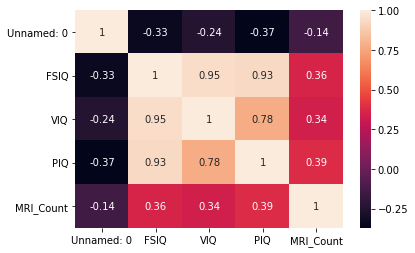

In [15]:
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## "горячая карта" помогает хорошо визуализировать матрицу корреляции и найти наиболее интересные данные

### T-test

#### Односторонний t-test (ttest_1samp)

$$t = \frac{\bar{X} - M}{SE}$$

Гипотеза $H_0: M_{\text{data[VIQ]}} = 120 $

In [13]:
stats.ttest_1samp(data['VIQ'], 120)

Ttest_1sampResult(statistic=-2.0487224279216516, pvalue=0.047261241275810835)

#### Двусторонний t-test (ttest_ind)

$$t = \dfrac{(\bar{X_1} - \bar{X_2}) - (M_1 - M_2)}{ \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} = \dfrac{\bar{X_1} - \bar{X_2}}{ \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $$

Гипотеза $H_0: M_{\text{female_viq}} = M_{\text{male_viq}} $

In [32]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']

stats.ttest_ind(female_viq, male_viq) 

Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

Гипотеза $H_0: M_{\text{data['FSIQ']}} = M_{\text{data['PIQ']}} $

In [33]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

#### Парный t-test (ttest_rel)

Гипотеза $H_0: M_{\text{data['FSIQ'] - data['PIQ']}} = 0 $

In [34]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])  

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

Тоже самое для одностороннего теста

In [35]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

Подробнее про эти тесты в scipy.stats http://benalexkeen.com/comparative-statistics-in-python-using-scipy/